# SIMPLY NEURAL NETWORK COMPUTATION

##### Steps to build a Neural Network in NumPy



## Assignment Overview
In this assignment, you will be developing a basic neural network from scratch using Python. The goal is to understand the fundamental components of a neural network by implementing the crucial processes that drive its learning capabilities.

You will fill in the `.......` sections with the necessary code that corresponds to the outlined tasks. Each section requires you to consider mathematical formulations and dimensions of the variables used, which will help reinforce your understanding of how data flows through the network and how various components interact.

**Important Sections:**

1. **Loading the Dataset (Input and Output)**  
   This section involves reading and preprocessing a dataset that the neural network will learn from. You will load features (inputs) and labels (outputs) that the model will try to predict.

2. **Architecture of the Model (# Input, Hidden and Output Neurons)**  
   Here, you will define the structure of the neural network. It is essential to determine the number of neurons in the input layer (which corresponds to the number of features in your dataset), the hidden layer(s) (which will be responsible for learning complex representations), and the output layer (which will provide the final predictions).

3. **Initializing Weights for All Layers**  
   In this section, you will set up the initial weights and biases for the neurons. Proper initialization is crucial for ensuring that the learning process starts effectively, avoiding issues such as vanishing or exploding gradients.

4. **Implementing Forward Propagation**  
   Forward propagation is where you compute the output of the network given its inputs and current weights. By applying activation functions, you will pass the inputs through the network, layer by layer, to obtain the final prediction.

5. **Implementing Backward Propagation**  
   Backward propagation is the process of updating the weights based on the error between the predicted output and the actual labels. You will compute gradients of the loss function with respect to the weights and use these to make adjustments that minimize the error.

6. **Train the Model for n Epochs**  
   This section will involve iterating over the training data for a specified number of epochs, applying forward and backward propagation to refine the model's weights. During training, you will monitor the loss to evaluate the model's performance and convergence.


## 1. Loading the dataset (Input and Output)

In [ ]:
# importing required libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# version of numpy library
print('Version of numpy:',np.__version__)

Version of numpy: 1.26.4


In [ ]:
# version of matplotlib library
print('Version of matplotlib:',matplotlib.__version__)

Version of matplotlib: 3.10.0


In [ ]:
# creating the input array
X=np.array([[1,0,1,0,1], [1,0,1,1,0], [1,1,0,1,1],[1,0,1,0,1],[1,1,1,0,1],[1,1,1,1,1],[1,0,0,0,1],[0,0,0,0,1]])
print ('\n Input:')
print(X)
# shape of input array
print('\n Shape of Input:', X.shape)


 Input:
[[1 0 1 0 1]
 [1 0 1 1 0]
 [1 1 0 1 1]
 [1 0 1 0 1]
 [1 1 1 0 1]
 [1 1 1 1 1]
 [1 0 0 0 1]
 [0 0 0 0 1]]

 Shape of Input: (8, 5)


In [ ]:
# converting the input in matrix form
X = X.T
print('\n Input in matrix form:')
print(X)
# shape of input matrix
print('\n Shape of Input Matrix:', X.shape)


 Input in matrix form:
[[1 1 1 1 1 1 1 0]
 [0 0 1 0 1 1 0 0]
 [1 1 0 1 1 1 0 0]
 [0 1 1 0 0 1 0 0]
 [1 0 1 1 1 1 1 1]]

 Shape of Input Matrix: (5, 8)


In [ ]:
# creating the output array
y=np.array([[1],[1],[0],[1],[1],[0],[1],[1]])
print ('\n Actual Output:')
print(y)

# output in matrix form
y = y.T

print ('\n Output in matrix form:')
print(y)

# shape of input array
print('\n Shape of Output:', y.shape)


 Actual Output:
[[1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]]

 Output in matrix form:
[[1 1 0 1 1 0 1 1]]

 Shape of Output: (1, 8)


## 2. Architecture of the model (# input, hidden and output neurons)

In [ ]:
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

![alt text](https://drive.google.com/uc?id=1zrEFVsc6bMQZ7fRxbK4DRceaG78k26Pc)

## 3. Initializing the weights for all the layers

NOTE: For simplicity, we are assuming that the bias for all the layers is 0

In [ ]:
# initializing weight
# Shape of w_ih should number of neurons at input layer X number of neurons at hidden layer

np.random.seed(30)

w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))

# Shape of w_ho should number of neurons at hidden layer X number of neurons at output layer
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

In [ ]:
# shape of weight matrix
w_ih.shape, w_ho.shape

((5, 3), (3, 1))

## 4. Implementing forward propagation

![alt text](https://drive.google.com/uc?id=1YwD7vY9k84vZmjmE5CXgQ69fYyadPsox)

In [ ]:
# We are using sigmoid as an activation function so defining the sigmoid function here

# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [ ]:
# hidden layer activations

hidden_layer_input=np.dot(w_ih.T,X)

hiddenlayer_activations = sigmoid(hidden_layer_input)

In [ ]:
hidden_layer_input.shape

(3, 8)

![alt text](https://drive.google.com/uc?id=1ETMoLD1fwi5u1HHLqtAdVUs-P8HNOU_p)

In [ ]:
# calculating the output
output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
output = sigmoid(output_layer_input)

In [ ]:
output.shape

(1, 8)

In [ ]:
# output
output

array([[0.75590146, 0.74359875, 0.76335898, 0.75590146, 0.76514595,
        0.77119638, 0.73956185, 0.7116861 ]])

## 5. Implementing backward propagation

![alt text](https://drive.google.com/uc?id=1uYdg4mQL-B9o7BTOLnfoYUhh_LxTnpcW)

In [ ]:
# calculating error
error = np.square(y-output)/2

In [ ]:
error

array([[0.02979205, 0.0328708 , 0.29135846, 0.02979205, 0.02757821,
        0.29737193, 0.03391401, 0.04156245]])

### Rate of change of error w.r.t weight between hidden and output layer

![alt text](https://drive.google.com/uc?id=1_KexjgVJGRptZ6t1eobTter3mfIGo9rs)

**a. Rate of change of error w.r.t output**

- `Mathematical notation:`$$ \frac{\partial E}{\partial \hat{y}} = \hat{y} - y $$  
- `Dimensions:` $$y$$ and $$\hat{y}$$ are dimension  **(1, 8)** so the derivative $$ \hat{y} - y $$ will also have dimensions **(1, 8)**

In [ ]:
# rate of change of error w.r.t. output
error_wrt_output = output - y

error_wrt_output

array([[-0.24409854, -0.25640125,  0.76335898, -0.24409854, -0.23485405,
         0.77119638, -0.26043815, -0.2883139 ]])

**b. Rate of change of output w.r.t Z2**
- `Mathematical notation:`
The output $$\hat{y}$$ is obtained using the sigmoid activation function: $$\hat{y} = \sigma(Z_2)$$
where $$Z_2$$ is the input to the output layer.The derivative of $$\hat{y}$$ with respect to $$Z_2$$ is given by:
$$\frac{\partial \hat{y}}{\partial Z_2} = \hat{y} (1 - \hat{y})$$

- `Dimensions:`

Since $$\hat{y}$$ i.e., `output` has dimensions **(1, 8)**, $$Z_2$$ also has dimensions **(1, 8)**.  
Thus, $$\frac{\partial \hat{y}}{\partial Z_2}$$ will have dimensions **(1, 8)**.

In [ ]:
# rate of change of output w.r.t. Z2
output_wrt_Z2 = output * (1 - output)
output_wrt_Z2

array([[0.18451444, 0.19065965, 0.18064205, 0.18451444, 0.17969763,
        0.17645252, 0.19261012, 0.20518899]])

**c. Rate of change of Z2 w.r.t weights between hidden and output layer**
- `Mathematical notation:`

The input to the output layer, $$Z_2$$, is given by:

$$Z_2 = W_{ho}^T \cdot A[1]$$

where:
$$W_{ho}$$ is the weight matrix between the hidden and output layer.
$$A[1]$$ represents the activations from the hidden layer.

The rate of change of $$Z_2$$ with respect to $$W_{ho}$$ is:

$$\frac{\partial Z_2}{\partial W_{ho}} = A[1]$$

- `Dimensions:`

$$Z_2$$ has dimensions **(1, 8)**.
$$W_{ho}$$ has dimensions **(3,1)**, meaning $$W_{ho}^T$$ has dimensions **(1,3)**.
$$A[1]$$ i.e., `hiddenlayer_activations` has dimensions **(3, 8)**.

Thus, the derivative $$\frac{\partial Z_2}{\partial W_{ho}}$$ has dimensions **(3, 8)**.

In [ ]:
# rate of change of Z2 w.r.t. weights between hidden and output layer
Z2_wrt_who = hiddenlayer_activations
Z2_wrt_who

array([[0.89604857, 0.88519619, 0.84975244, 0.89604857, 0.91033414,
        0.93845185, 0.76175399, 0.62672124],
       [0.79941811, 0.6796232 , 0.90434351, 0.79941811, 0.91255747,
        0.92283494, 0.75907293, 0.6828402 ],
       [0.89867537, 0.85727982, 0.92327476, 0.89867537, 0.92616737,
        0.95578168, 0.8315844 , 0.71785574]])

In [ ]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_who.shape

((1, 8), (1, 8), (3, 8))

In [ ]:
# shape of weights of output layer
w_ho.shape

(3, 1)

![alt text](https://drive.google.com/uc?id=1VesmZOVpfgLFESvOFd7dE-YHNtSMMkvM)

In [ ]:
# rate of change of error w.r.t weight between hidden and output layer
error_wrt_who = np.dot(Z2_wrt_who, (error_wrt_output * output_wrt_Z2).T)
error_wrt_who

array([[0.00718526],
       [0.02806259],
       [0.0112474 ]])

In [ ]:
error_wrt_who.shape

(3, 1)

### Rate of change of error w.r.t weight between input and hidden layer

![alt text](https://drive.google.com/uc?id=1X4-iInwlv7ber3fwgtqHuHTuFRci-tMV)

**a. Rate of change of error w.r.t output**

- `Mathematical notation:`$$ \frac{\partial E}{\partial \hat{y}} = \hat{y} - y $$  
- `Dimensions:` $$y$$ and $$\hat{y}$$ are dimension  **(1, 8)** so the derivative $$ \hat{y} - y $$ will also have dimensions **(1, 8)**

In [ ]:
# rate of change of error w.r.t. outpu t
error_wrt_output = output - y

error_wrt_output

array([[-0.24409854, -0.25640125,  0.76335898, -0.24409854, -0.23485405,
         0.77119638, -0.26043815, -0.2883139 ]])

**b. Rate of change of output w.r.t Z2**
- `Mathematical notation:`
The output $$\hat{y}$$ is obtained using the sigmoid activation function: $$\hat{y} = \sigma(Z_2)$$
where $$Z_2$$ is the input to the output layer.The derivative of $$\hat{y}$$ with respect to $$Z_2$$ is given by:
$$\frac{\partial \hat{y}}{\partial Z_2} = \hat{y} (1 - \hat{y})$$

- `Dimensions:`

Since $$\hat{y}$$ i.e., `output` has dimensions **(1, 8)**, $$Z_2$$ also has dimensions **(1, 8)**.  
Thus, $$\frac{\partial \hat{y}}{\partial Z_2}$$ will have dimensions **(1, 8)**.

In [ ]:
output_wrt_Z2 = output * (1 - output)

output_wrt_Z2

array([[0.18451444, 0.19065965, 0.18064205, 0.18451444, 0.17969763,
        0.17645252, 0.19261012, 0.20518899]])

**c. Rate of change of Z2 w.r.t hidden layer activations**

- `Mathematical notation:`

The input to the output layer, $$Z_2$$, is given by:

$$Z_2 = W_{ho}^T \cdot A[1]$$

where:
$$W_{ho}$$ is the weight matrix between the hidden and output layer.
$$A[1]$$ represents the activations from the hidden layer.

The rate of change of $$Z_2$$ with respect to $$A[1]$$ is:

$$\frac{\partial Z_2}{\partial A[1]} = W_{ho}^T$$

- `Dimensions:`

$$W_{ho}$$ has dimensions **(3,1)**, meaning $$\frac{\partial Z_2}{\partial A[1]}$$ has dimensions **(1,3)**.

In [ ]:
# rate of change of Z2 w.r.t. hidden layer activations

Z2_wrt_h1 = w_ho.T

Z2_wrt_h1

array([[0.08970338, 0.19577126, 0.99419368]])

**d. Rate of change of hidden layer activations w.r.t Z1**

- `Mathematical notation:`
The output $$A[1]$$ is obtained using the sigmoid activation function: $$A[1] = \sigma(Z_1)$$
where $$Z_1$$ is the input to the hidden layer.The derivative of $$A[1]$$ with respect to $$Z_1$$ is given by:
$$\frac{\partial A[1]}{\partial Z_1} = A[1] (1 - A[1])$$

- `Dimensions:`

Since $$A[1]$$ has dimensions **(3, 8)**,
Thus, $$\frac{\partial A[1]}{\partial Z_1}$$ will have dimensions **(3, 8)**.

In [ ]:
# rate of change of hidden layer activations w.r.t. Z1
h1_wrt_Z1 = hiddenlayer_activations * (1 - hiddenlayer_activations)

h1_wrt_Z1

array([[0.09314553, 0.1016239 , 0.12767323, 0.09314553, 0.0816259 ,
        0.05775998, 0.18148485, 0.23394173],
       [0.1603488 , 0.21773551, 0.08650633, 0.1603488 , 0.07979633,
        0.07121061, 0.18288122, 0.21656946],
       [0.09105795, 0.12235113, 0.07083848, 0.09105795, 0.06838137,
        0.04226306, 0.14005179, 0.20253888]])

**e. Rate of change of Z1 w.r.t weights between input and hidden layer**
- `Mathematical notation:`

The input to the hidden layer, $$Z_1$$, is given by:

$$Z_1 = W_{ih}^T \cdot X]$$

where:
$$W_{ih}$$ is the weight matrix between the imput and hidden layer.

$$X$$ represents the imput from the imput layer.

The rate of change of $$Z_1$$ with respect to $$W_{ih}$$ is:

$$\frac{\partial Z_1}{\partial W_{ih}} = X$$


- `Dimensions:`

$$X$$ has dimensions **(5,8)**

Thus, the derivative $$\frac{\partial Z_1}{\partial W_{ih}}$$ has dimensions **(5,8)**.

In [ ]:
# rate of change of Z1 w.r.t. weights between input and hidden layer
Z1_wrt_wih = X

Z1_wrt_wih

array([[1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 1, 1, 1, 1, 1]])

In [ ]:
# checking the shapes of partial derivatives
error_wrt_output.shape, output_wrt_Z2.shape, Z2_wrt_h1.shape, h1_wrt_Z1.shape, Z1_wrt_wih.shape

((1, 8), (1, 8), (1, 3), (3, 8), (5, 8))

In [ ]:
# shape of weights of hidden layer
w_ih.shape

(5, 3)

![alt text](https://drive.google.com/uc?id=1RkG5x1NEFWlF3tj0OlswOWvBcV5XNV1C)

In [ ]:
# rate of change of error w.r.t weights between input and hidden layer

error_wrt_wih = Z1_wrt_wih @ (h1_wrt_Z1 * Z2_wrt_h1.T.dot(error_wrt_output * output_wrt_Z2)).T

In [ ]:
error_wrt_wih.shape

(5, 3)

### Update the parameters

![alt text](https://drive.google.com/uc?id=1A5jaB3WjZx9yrJkk9imVEvP3PZodjapE)

In [ ]:
# defining the learning rate
lr = 0.01

In [ ]:
# initial w_ho and w_ih
w_ho

array([[0.08970338],
       [0.19577126],
       [0.99419368]])

In [ ]:
w_ih

array([[0.64414354, 0.38074849, 0.66304791],
       [0.16365073, 0.96260781, 0.34666184],
       [0.99175099, 0.2350579 , 0.58569427],
       [0.4066901 , 0.13623432, 0.54413629],
       [0.51817635, 0.76685511, 0.93385014]])

In [ ]:
# updating the weights of output layer
w_ho -= lr * error_wrt_who

In [ ]:
# updating the weights of hidden layer
w_ih -= lr * error_wrt_wih

In [ ]:
# updated w_ho and w_ih
w_ho

array([[0.08963153],
       [0.19549063],
       [0.99408121]])

In [ ]:
w_ih

array([[0.64414393, 0.38077983, 0.66313316],
       [0.16363097, 0.96257208, 0.34653624],
       [0.99175901, 0.23509463, 0.5858068 ],
       [0.40667171, 0.13621284, 0.54404146],
       [0.5181847 , 0.76689069, 0.93399506]])

## 6. Training the model for n epochs

In [ ]:
# defining the model architecture
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer

# initializing weight

np.random.seed(12)

w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))

# defining the parameters (hyperparameters)
lr = 0.01
epochs = 30000

In [ ]:
# initial w_ih and w_ho
w_ih

array([[0.15416284, 0.7400497 , 0.26331502],
       [0.53373939, 0.01457496, 0.91874701],
       [0.90071485, 0.03342143, 0.95694934],
       [0.13720932, 0.28382835, 0.60608318],
       [0.94422514, 0.85273554, 0.00225923]])

In [ ]:
w_ho

array([[0.52122603],
       [0.55203763],
       [0.48537741]])

In [ ]:
error_epoch = []

for i in range(epochs):

    # Forward Propogation (you need to provide the code of the Forward Propagation)
    hidden_layer_input=np.dot(w_ih.T,X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)
    output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
    output = sigmoid(output_layer_input)

    error = np.square(y - output) / 2  # Erreur quadratique moyenne
    avg_error = np.mean(error)

    #===================================================================
    # Backward Propagation (you need to provide the code of the Backward Propagation)

    # rate of change of error w.r.t. output
    error_wrt_output = output - y
    # rate of change of output w.r.t. Z2
    output_wrt_Z2 = output * (1 - output)

    # rate of change of error w.r.t weight between hidden and output layer
    Z2_wrt_who = hiddenlayer_activations
    error_wrt_who = np.dot(Z2_wrt_who, (error_wrt_output * output_wrt_Z2).T)

    # rate of change of Z2 w.r.t. hidden layer activations
    Z2_wrt_h1 = w_ho.T
    # rate of change of hidden layer activations w.r.t. Z1
    h1_wrt_Z1 = hiddenlayer_activations * (1 - hiddenlayer_activations)
    # rate of change of Z1 w.r.t. weights between input and hidden layer
    Z1_wrt_wih = X

    # rate of change of error w.r.t weights between input and hidden layer

    error_wrt_wih = Z1_wrt_wih @ (h1_wrt_Z1 * Z2_wrt_h1.T.dot(error_wrt_output * output_wrt_Z2)).T

    #===================================================================

    # updating the weights of output layer
    w_ho -= lr * error_wrt_who
    # updating the weights of hidden layer
    w_ih -= lr * error_wrt_wih

    # appending the error of each epoch
    error_epoch.append(np.average(error))

In [ ]:
# updated w_ih and w_ho
w_ih

array([[ 0.23093998,  1.68941372, -0.54350915],
       [-1.87426741, -3.19597013,  1.82308393],
       [ 1.77210365,  2.06646003, -0.31389417],
       [-2.03446749, -2.85975132,  1.35646675],
       [ 0.14246621,  0.31173263, -0.29256117]])

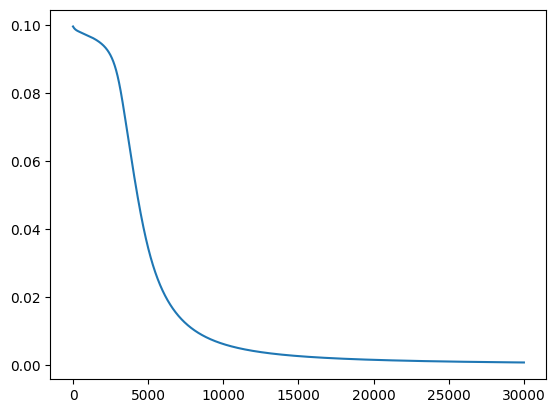

In [ ]:
# visualizing the error after each epoch
plt.plot(np.arange(1,epochs+1), np.array(error_epoch))

plt.show()

In [ ]:
# final output from the model
output

array([[0.99936882, 0.95358864, 0.02973061, 0.99936882, 0.95582628,
        0.08185316, 0.99624242, 0.96107083]])

In [ ]:
# actual target
y

array([[1, 1, 0, 1, 1, 0, 1, 1]])

In [ ]:
# error at last epoch
np.mean(error)

0.0008262236105912408